In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import TextVectorization

# Data Loading and Preprocessing
data_directory = "/content/drive/MyDrive/train"  # Replace with the path to your data directory
save_directory = "/content/drive/MyDrive/Save"
disease_categories = sorted(os.listdir(data_directory))




def image_preprocessing(data_directory, disease_categories):
    images = []
    labels = []

    # Find the minimum number of files across all categories
    min_files = min([len(os.listdir(os.path.join(data_directory, category))) for category in disease_categories])

    for category in disease_categories:
        category_dir = os.path.join(data_directory, category)

        # Traverse through the minimum number of files
        for i, image_name in enumerate(os.listdir(category_dir)):
            if i >= min_files:
                break

            image_path = os.path.join(category_dir, image_name)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(disease_categories.index(category))

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

image_preprocessing(data_directory,disease_categories)

#save_preprocessed_data
# Example usage:
images, labels = image_preprocessing(data_directory, disease_categories)

# Function to save processed data
def save_processed_data(images, labels, save_directory):
    np.save(os.path.join(save_directory, 'images.npy'), images)
    np.save(os.path.join(save_directory, 'labels.npy'), labels)



save_processed_data(images, labels, save_directory)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Feature Selection (Let's assume we select all features)

# Data Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(disease_categories, np.bincount(labels))
plt.title('Bar Graph of Disease Categories')
plt.subplot(1, 2, 2)
plt.pie(np.bincount(labels), labels=disease_categories, autopct='%1.1f%%')
plt.title('Pie Chart of Disease Categories')
plt.show()

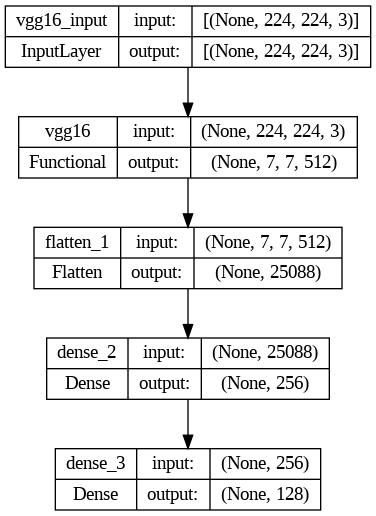

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

# Define the feature extraction model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

feature_extractor = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu')
])

# Plot the model architecture
plot_model(feature_extractor, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
import os
import numpy as np
# Step 3: Load processed data
load_directory = "/content/drive/MyDrive/Save"
loaded_images = np.load(os.path.join(load_directory, 'images.npy'))
loaded_labels = np.load(os.path.join(load_directory, 'labels.npy'))

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target vector respectively
# Replace X and y with your actual feature matrix and target vector
# X should have shape (1264, 224, 224, 3) and y should have shape (1264,)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(loaded_images, loaded_labels, test_size=0.2, random_state=0)

# Print the shapes of the resulting arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1264, 224, 224, 3)
Shape of X_test: (316, 224, 224, 3)
Shape of y_train: (1264,)
Shape of y_test: (316,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming X_train and X_test are your feature matrices for training and testing data respectively
# Assuming y_train and y_test are your labels for training and testing data respectively
# Replace X_train, X_test, y_train, and y_test with your actual data

# Concatenate train and test data for PCA
X_combined = np.vstack([X_train, X_test])

# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_combined_2d = pca.fit_transform(X_combined.reshape(-1, 224 * 224 * 3))

# Split the combined data back into train and test sets
X_train_2d = X_combined_2d[:len(X_train)]
X_test_2d = X_combined_2d[len(X_train):]

# Train your classifier (Logistic Regression, for example) on the transformed training data
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_2d, y_train)

# Predict labels for the transformed testing data
y_pred = classifier.predict(X_test_2d)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.47      0.32        68
           1       0.00      0.00      0.00        67
           2       0.20      0.16      0.18        56
           3       0.31      0.31      0.31        72
           4       0.20      0.26      0.23        53

    accuracy                           0.24       316
   macro avg       0.19      0.24      0.21       316
weighted avg       0.19      0.24      0.21       316



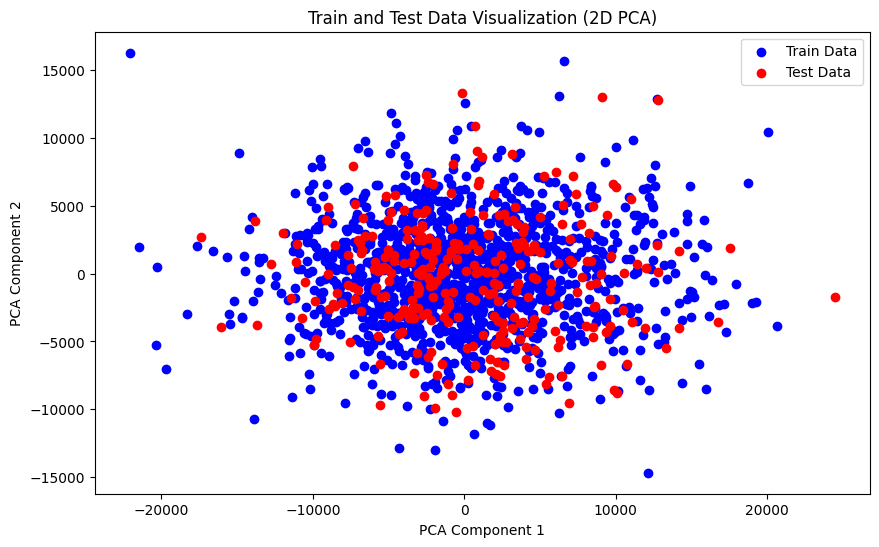

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your feature matrices for training and testing data respectively
# Replace X_train and X_test with your actual feature matrices

# Concatenate train and test data for PCA
X_combined = np.vstack([X_train, X_test])

# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_combined_2d = pca.fit_transform(X_combined.reshape(-1, 224 * 224 * 3))

# Split the combined data back into train and test sets
X_train_2d = X_combined_2d[:len(X_train)]
X_test_2d = X_combined_2d[len(X_train):]

# Plot train and test data based on PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c='b', label='Train Data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c='r', label='Test Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Train and Test Data Visualization (2D PCA)')
plt.legend()
plt.show()

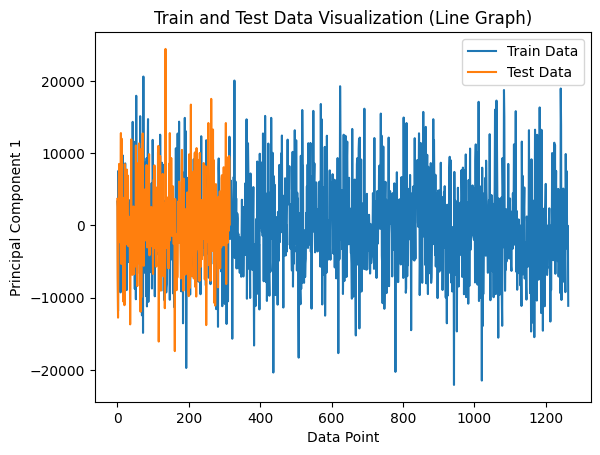

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your feature matrices for training and testing data respectively
# Assuming y_train and y_test are your labels for training and testing data respectively
# Assuming you have performed PCA and obtained X_train_2d and X_test_2d

# Choose one of the principal components for plotting
component_index = 0  # You can change this index to plot different components

# Plot train data
plt.plot(X_train_2d[:, component_index], label='Train Data')

# Plot test data
plt.plot(X_test_2d[:, component_index], label='Test Data')

# Add labels and title
plt.xlabel('Data Point')
plt.ylabel('Principal Component {}'.format(component_index + 1))
plt.title('Train and Test Data Visualization (Line Graph)')
plt.legend()
plt.show()


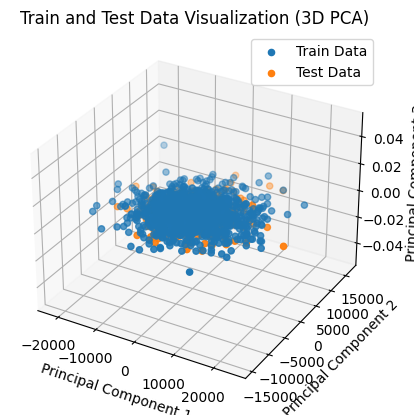

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot train data in 3D PCA space
ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], label='Train Data')

# Plot test data in 3D PCA space
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], label='Test Data')

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Train and Test Data Visualization (3D PCA)')
plt.legend()

# Show plot
plt.show()